<h1> PREDICTING LIFE EXPECTANCY WITH PYTHON </h1>

<h3>importing the important libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bc10fbafb9e0403b81b08a5cfda604f6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='GOK9gtVI8NtICs36239BI4B_SvCwfr7eXCxdpWzXOmLP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_bc10fbafb9e0403b81b08a5cfda604f6.get_object(Bucket='lifeexpectancy-donotdelete-pr-oarxka9g6np3ia',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.drop(labels='Country',axis=1,inplace=True) #Dropping the country column as it is non numeric 

In [4]:
df.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<h3> Filling the NAN values with mean </h3>

In [5]:
df['Life expectancy '].fillna(df['Life expectancy '].mean(), inplace = True)
df['Adult Mortality'].fillna(df['Adult Mortality'].mean(), inplace = True)
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace = True)
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace = True)
df[' BMI '].fillna(df[' BMI '].mean(),inplace = True)
df['Polio'].fillna(df['Polio'].mean(), inplace = True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(), inplace = True)
df['Diphtheria '].fillna(df['Diphtheria '].mean(), inplace = True)
df['GDP'].fillna(df['GDP'].mean(), inplace = True)
df['Population'].fillna(df['Population'].mean(), inplace = True)
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean(), inplace = True)
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean(), inplace = True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace = True)
df['Schooling'].fillna(df['Schooling'].mean(), inplace = True)


In [6]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

<h3> Finding the Correlation among the variables </h3>

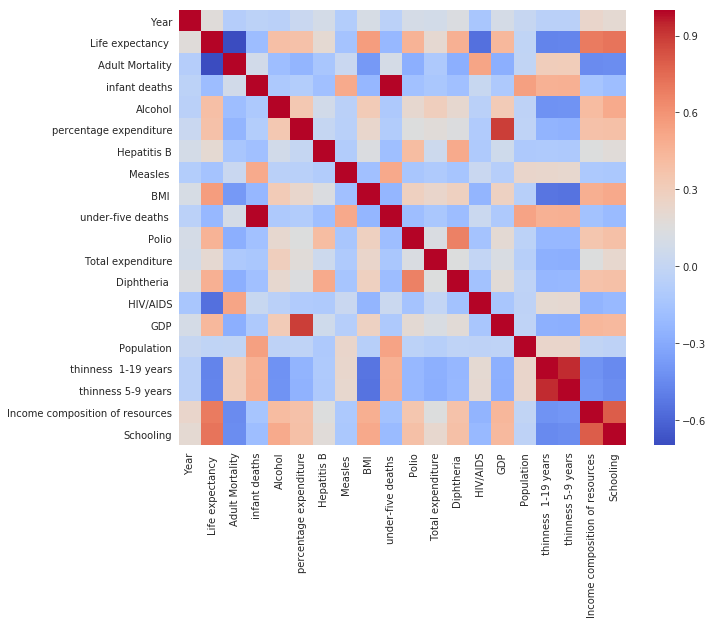

In [7]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
correlations=df.corr()
sns.heatmap(correlations, cmap='coolwarm')

<h3> It is observed that Adult Mortality shows strong negative correlation to the life expectancy </h3>

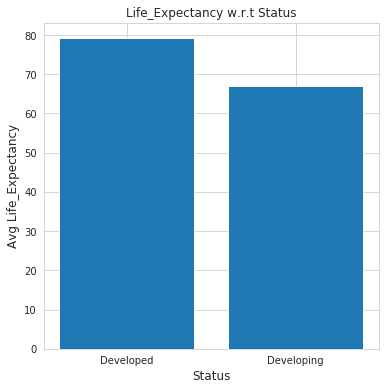

In [8]:
plt.figure(figsize=(6,6))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['Life expectancy '].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()


In [9]:
columns=df.columns
columns=list(columns)
#columns.remove('Country')
columns.remove('Status')

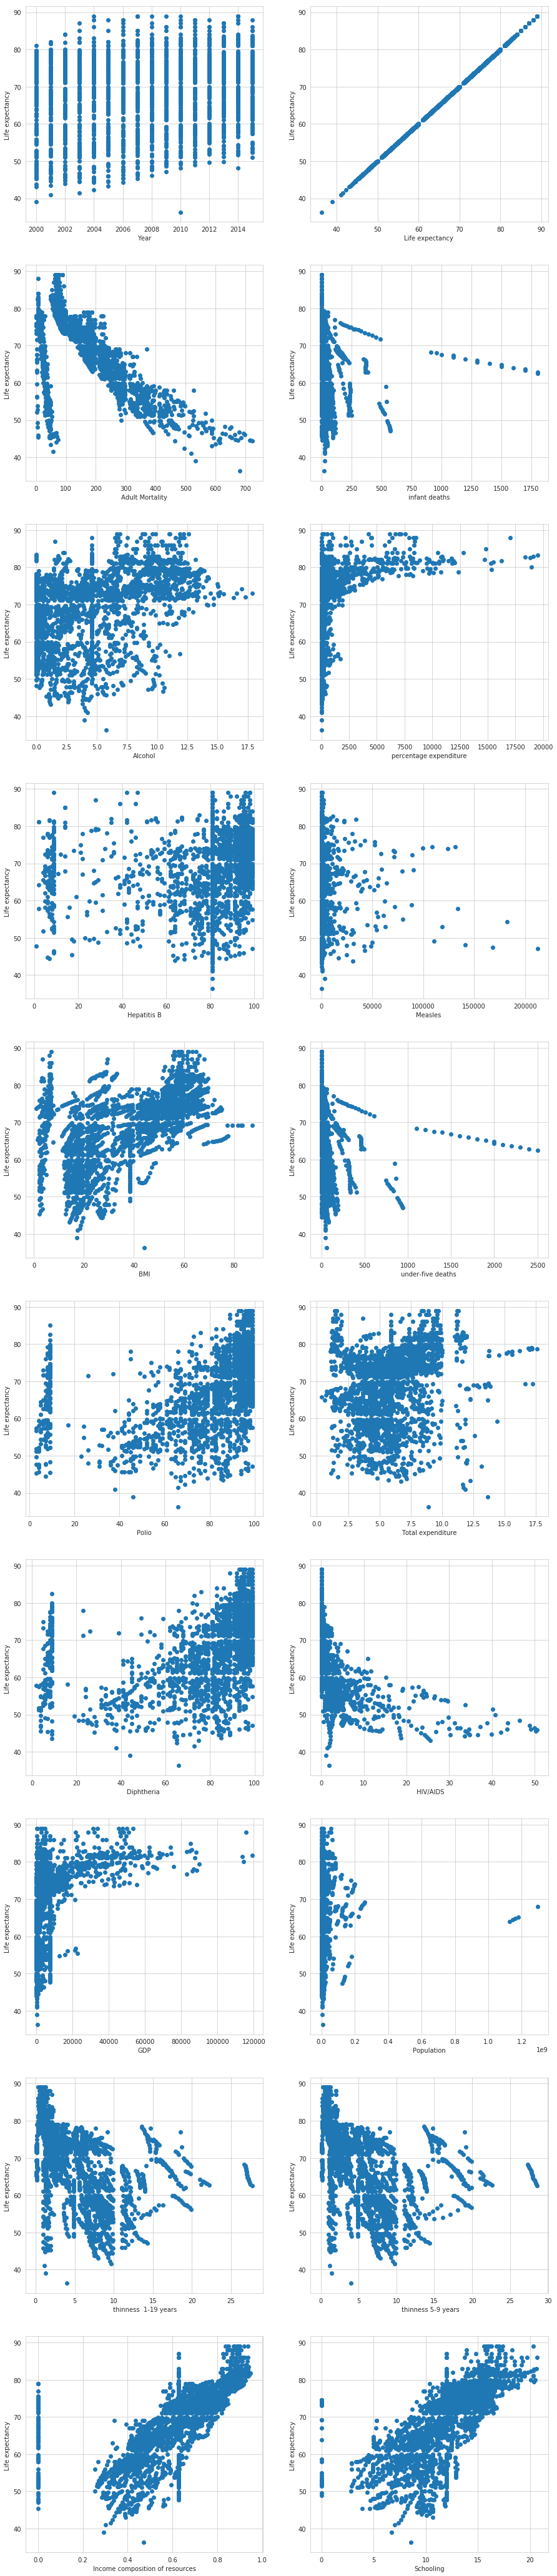

In [10]:
plt.figure(figsize=(15,75))
for i in range(len(columns)):
    plt.subplot(10,2,i+1)
    plt.scatter(df[columns[i]],df['Life expectancy '])
    plt.xlabel(columns[i])
    plt.ylabel('Life expectancy ')
plt.show()


In [11]:
y=df['Life expectancy ']
x=df.drop(labels='Life expectancy ',axis=1)


<h3> Label Encoding the non numeric variable  </h3>

In [12]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder=LabelEncoder()
x['Status']=encoder.fit_transform(x['Status'])


<h3> Splitting into train and test </h3>

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.32,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
y_pred=lr.predict(x_test)

In [19]:
from sklearn.metrics import r2_score,mean_squared_error

In [20]:
r2_score(y_test,y_pred)

0.8187027407149208

In [21]:
mean_squared_error(y_test,y_pred)

15.904269094681425

<h3> Deploying the Model </h3>

In [22]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-07-03 19:02:38,128 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [23]:
wml_credentials={
  "apikey": "1SxZVKbXk4pr7RZzE34yOCWsYuGE4Vc6oVAiNzd7jHwg",
  "iam_apikey_description": "Auto-generated for key b4e24b9f-cb02-430e-94a9-f0f2dffdad4a",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/4fdfb61960bc4cfe8e9efd176bd91fd1::serviceid:ServiceId-a3d74431-40de-4bbb-b416-812d0e8b6d8a",
  "instance_id": "9bee9c68-dde6-412b-a7a5-5f5c1ddb8362",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [24]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [25]:
metadata={
    client.repository.ModelMetaNames.AUTHOR_NAME: "Shruti",
    client.repository.ModelMetaNames.AUTHOR_EMAIL: "shrutimundi@gmail.com",
    client.repository.ModelMetaNames.NAME: "LifeExpectancyPrediction"
    
}

In [26]:
store_data=client.repository.store_model(lr,meta_props=metadata)

In [27]:
store_data

{'metadata': {'guid': '18f90adc-08cc-444a-b563-944ff4dee1ec',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/9bee9c68-dde6-412b-a7a5-5f5c1ddb8362/published_models/18f90adc-08cc-444a-b563-944ff4dee1ec',
  'created_at': '2020-07-03T19:02:38.772Z',
  'modified_at': '2020-07-03T19:02:38.830Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/9bee9c68-dde6-412b-a7a5-5f5c1ddb8362/published_models/18f90adc-08cc-444a-b563-944ff4dee1ec/learning_configuration',
  'author': {'name': 'Shruti'},
  'name': 'LifeExpectancyPrediction',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/9bee9c68-dde6-412b-a7a5-5f5c1ddb8362/published_models/18f90adc-08cc-444a-b563-944ff4dee1ec/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/9bee9c68-dde6-412b-a7a5-5f5c1ddb8362/published_models/18f90adc-08cc-444a-b563-944ff4dee1ec/feedback',
  'latest_version': {

In [28]:
modeluid=client.repository.get_model_uid(store_data)

In [29]:
client.deployments.list()

------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                 TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
abe0d9d5-b4a3-46e1-884a-5da690b28293  Artifact deployment  online  DEPLOY_SUCCESS  2020-07-01T12:17:09.720Z  scikit-learn-0.20  model
101946c8-865c-4096-b8a6-e74da03a6fc1  Artifact deployment  online  DEPLOY_SUCCESS  2020-07-01T12:04:14.028Z  scikit-learn-0.20  model
bc670718-3a4d-4a37-b79e-40149cbfa97a  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-30T22:45:51.375Z  scikit-learn-0.20  model
90323eb5-34f0-4dce-a17e-e189e554fb44  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-26T20:57:41.785Z  scikit-learn-0.20  model
------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------


In [30]:
client.deployments.delete('101946c8-865c-4096-b8a6-e74da03a6fc1')

'SUCCESS'

In [31]:
deploy=client.deployments.create(modeluid)



#######################################################################################

Synchronous deployment creation for uid: '18f90adc-08cc-444a-b563-944ff4dee1ec' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='37d2ca49-eae7-4c95-a0ba-02efb50d22a2'
------------------------------------------------------------------------------------------------




In [32]:
deploy

{'metadata': {'guid': '37d2ca49-eae7-4c95-a0ba-02efb50d22a2',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/9bee9c68-dde6-412b-a7a5-5f5c1ddb8362/deployments/37d2ca49-eae7-4c95-a0ba-02efb50d22a2',
  'created_at': '2020-07-03T19:02:41.737Z',
  'modified_at': '2020-07-03T19:02:42.272Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Artifact deployment',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/9bee9c68-dde6-412b-a7a5-5f5c1ddb8362/deployments/37d2ca49-eae7-4c95-a0ba-02efb50d22a2/online',
  'deployable_asset': {'name': 'LifeExpectancyPrediction',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/9bee9c68-dde6-412b-a7a5-5f5c1ddb8362/published_models/18f90adc-08cc-444a-b563-944ff4dee1ec',
   'guid': '18f90adc-08cc-444a-b563-944ff4dee1ec',
   'created_at': '2020-07-03T19:02:41.712Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.20'

In [33]:
scoring_endpoints=client.deployments.get_scoring_url(deploy)

In [34]:
scoring_endpoints

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/9bee9c68-dde6-412b-a7a5-5f5c1ddb8362/deployments/37d2ca49-eae7-4c95-a0ba-02efb50d22a2/online'